# Exploratory Data Analysis of Covid-19 data

### (This analysis was performed in June 2020 with data available till date.)

In [67]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)

In [68]:
# loading the input files into pandas dataframes
df_corona_in_india = pd.read_csv("covid_19_india.csv")
df_cummlative_numbers = pd.read_csv("complete.csv")
df_ICMR = pd.read_csv("ICMR_Testing_Data.csv")
df_Individual = pd.read_csv("IndividualDetails.csv")
df_Hospital = pd.read_csv("HospitalBedsIndia.csv")
df_Age = pd.read_csv("AgeGroupDetails.csv")
df_statewise_old = pd.read_csv("StatewiseTestingDetails.csv")
df_population_of_india = pd.read_csv("population_india_census2011.csv")
df_with_utm = pd.read_csv("UTM ZONES of INDIA.csv")
df_containment_zones= pd.read_csv("zones.csv")
df_Italy = pd.read_csv("covid19_italy_region.csv")
df_daily_US_states = pd.read_csv("us_states_covid19_daily.csv")
df_daily_USA = pd.read_csv("us_covid19_daily.csv")
df_lab = pd.read_csv("ICMRTestingLabs.csv")
df_statewise = pd.read_csv("datasets_StatewiseTestingDetails_22062020.csv")
df_corona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [69]:
### Latitude and longitude of various states and union territories of India
### required for geographical map plots, data available in 'utm zones India. csv'
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli and Daman and Diu":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397] , 
    'State Unassigned':[0,0]
}

## Data Cleaning and Preprocessing

In [71]:
#fixing the date column
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)

## Analysis of data

### 1. Daily Cases in India Datewise

In [74]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift()) #subtract and shift  
#shift function can have variable time frame, you could group the values in a weekly as well
## https://www.w3resource.com/pandas/dataframe/dataframe-shift.php 

corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0] #getting the first item in dataframe
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int) #converting to int type
fig = px.bar(corona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=500) #bar chart using plotly
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

###  2. Comparison of population and no of testing laboratories by state 

In [12]:
df_population_of_india.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [13]:
df_StateUT_pop = df_population_of_india[['State / Union Territory', 'Population']].set_index('State / Union Territory')
df_StateUT_pop.head()

,Population
State / Union Territory,
Uttar Pradesh,199812341
Maharashtra,112374333
Bihar,104099452
West Bengal,91276115
Madhya Pradesh,72626809


In [14]:
df_lab.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [15]:
df_lab["cnt"]=1

In [16]:
df_labnumbers = pd.DataFrame(df_lab.groupby("state")["cnt"].sum()).reset_index()
df_labnumbers.head()

,state,cnt
0,Andaman and Nicobar Islands,1
1,Andhra Pradesh,7
2,Arunachal Pradesh,1
3,Assam,6
4,Bihar,6


In [17]:
df_labnumbers = df_labnumbers.rename(columns={"state": "State / Union Territory", "cnt": "Number of labs"}).set_index("State / Union Territory")
df_labnumbers.head()

,Number of labs
State / Union Territory,
Andaman and Nicobar Islands,1
Andhra Pradesh,7
Arunachal Pradesh,1
Assam,6
Bihar,6


In [18]:
df_population_vs_labnumbers = pd.concat([df_StateUT_pop, df_labnumbers], axis=1)
df_population_vs_labnumbers

,Population,Number of labs
Uttar Pradesh,199812341.0,17.0
Maharashtra,112374333.0,39.0
Bihar,104099452.0,6.0
West Bengal,91276115.0,13.0
Madhya Pradesh,72626809.0,10.0
Tamil Nadu,72147030.0,26.0
Rajasthan,68548437.0,9.0
Karnataka,61095297.0,17.0
Gujarat,60439692.0,14.0
Andhra Pradesh,49577103.0,7.0


In [19]:
# data cleansing

df_population_vs_labnumbers['Population']['Telangana'] = 35003674.0
df_population_vs_labnumbers['Number of labs'].fillna(0, inplace = True)
df_population_vs_labnumbers.drop(["Telengana"], inplace = True)
df_population_vs_labnumbers = df_population_vs_labnumbers.reset_index()
df_population_vs_labnumbers = df_population_vs_labnumbers.rename(columns={"index": "State / Union Territory"})
df_population_vs_labnumbers

,State / Union Territory,Population,Number of labs
0,Uttar Pradesh,199812341.0,17.0
1,Maharashtra,112374333.0,39.0
2,Bihar,104099452.0,6.0
3,West Bengal,91276115.0,13.0
4,Madhya Pradesh,72626809.0,10.0
5,Tamil Nadu,72147030.0,26.0
6,Rajasthan,68548437.0,9.0
7,Karnataka,61095297.0,17.0
8,Gujarat,60439692.0,14.0
9,Andhra Pradesh,49577103.0,7.0


In [20]:
df_population_vs_labnumbers['Population in millions'] = df_population_vs_labnumbers['Population']/1000000
df_population_vs_labnumbers

,State / Union Territory,Population,Number of labs,Population in millions
0,Uttar Pradesh,199812341.0,17.0,199.812341
1,Maharashtra,112374333.0,39.0,112.374333
2,Bihar,104099452.0,6.0,104.099452
3,West Bengal,91276115.0,13.0,91.276115
4,Madhya Pradesh,72626809.0,10.0,72.626809
5,Tamil Nadu,72147030.0,26.0,72.147030
6,Rajasthan,68548437.0,9.0,68.548437
7,Karnataka,61095297.0,17.0,61.095297
8,Gujarat,60439692.0,14.0,60.439692
9,Andhra Pradesh,49577103.0,7.0,49.577103


In [21]:
fig = px.bar(df_population_vs_labnumbers.sort_values(by='Population in millions', ascending = True), x='State / Union Territory', y='Population in millions',
             hover_data=['Number of labs'], color='Number of labs', height=750,
            text='Number of labs')
fig.update_layout(
    title='Statewise population and number of ICMR testing labs')
fig.show()

### 3. Statewise tracker of total number of cases for April, May, June

In [22]:
df_statewise.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [23]:
df_statewise_new = df_statewise[['Date', 'State', 'Positive']]
df_statewise_new.head()

,Date,State,Positive
0,2020-04-17,Andaman and Nicobar Islands,12.0
1,2020-04-24,Andaman and Nicobar Islands,27.0
2,2020-04-27,Andaman and Nicobar Islands,33.0
3,2020-05-01,Andaman and Nicobar Islands,33.0
4,2020-05-16,Andaman and Nicobar Islands,33.0


In [24]:
df_statewise_new = pd.pivot_table(df_statewise_new, values='Positive', index=['State'],columns=['Date'], aggfunc=np.sum).fillna(0).astype(int)
df_statewise_new

Date,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,27,0,0,33,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,35,38,38,38,38,41,44,44,45,47,47,48,0
Andhra Pradesh,0,132,0,0,0,0,0,0,0,365,381,405,432,473,525,534,572,603,647,722,757,813,893,955,1016,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1777,1833,1887,1930,1980,2018,2051,2137,2100,2157,0,2230,2282,2339,2407,2452,2514,2561,2627,2671,2719,2787,2841,2874,2944,3045,3118,3200,3279,3377,3427,3588,3718,3843,3990,4126,4261,4402,4588,4841,5087,5280,5555,5854,6230,6620,7059,7451
Arunachal Pradesh,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,2,0,2,0,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,4,4,22,28,38,43,46,49,51,57,57,61,67,87,88,0,95,99,103,103,135,135,139,148
Assam,0,16,0,0,0,0,0,0,0,29,29,29,0,31,32,34,34,34,34,34,34,0,0,35,35,35,35,0,37,0,0,42,0,42,43,0,0,0,59,62,64,64,0,86,86,91,97,106,141,170,203,259,329,378,526,616,0,0,1024,1185,1272,0,1513,1672,1988,0,2397,2565,0,2937,0,3319,3498,0,0,4158,4319,4605,4861,4904,5006,5388,5586
Bihar,0,0,0,0,32,0,0,38,43,60,61,64,65,62,66,72,83,85,92,96,115,136,148,176,238,255,328,346,383,409,466,476,485,525,529,539,547,564,585,653,714,796,909,970,1010,1083,1193,1391,1495,1607,1881,2098,2344,2507,0,0,3010,3106,3276,3511,3692,3872,4049,4273,4420,4551,4745,4972,5176,5364,5583,5807,6043,6183,6355,6581,6736,6889,6993,7178,7380,7602,7808
Chandigarh,0,18,0,0,0,0,0,18,0,19,19,21,21,21,21,21,21,23,26,26,27,27,27,27,28,30,40,56,67,74,88,94,97,102,115,120,129,146,169,173,173,187,189,191,191,191,191,196,199,0,216,219,225,238,266,278,279,289,289,289,293,294,301,301,302,309,309,314,318,0,328,332,334,345,350,357,358,368,373,375,390,404,410
Chhattisgarh,0,9,0,0,0,0,0,0,0,18,18,31,31,33,33,33,36,36,36,36,36,36,36,36,37,37,37,38,38,40,43,0,57,0,58,59,0,59,59,59,0,59,59,59,66,67,0,93,100,0,128,172,214,0,292,360,364,398,415,447,492,539,556,626,756,863,923,1073,1160,1211,1262,1398,1429,1512,1549,1715,1784,1864,1946,2018,2076,2273,2302
Dadra and Nagar Haveli and Daman and Diu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,2,2,2,2,2,2,2,0,0,3,0,12,14,14,19,20,22,0,27,0,0,28,31,38,51,58,69,0,93,97,0
Delhi,0,0,0,0,0,0,576,0,720,903,1069,1154,1510,1561,1578,1640,1707,1893,2003,2081,2156,2248,2375,2514,2625,2918,3108,3314,3439,0,0,4122,4549,4898,5104,5532,5980,6318,6542,6923,7233,7639,7998,8470,8895,9333,9755,10054,10554,11088,11659,12319,12910,13418,14053,14465,15257,16281,17386,18549,19844,20834,22132,23645,25004,26334,27654,28936,29943,31309,32810,34687,36824,38958,41182,42829,44688,47102,49979,53116,56746,59746,62655


In [25]:
df_statewise_new.columns

Index(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
       '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
       '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',

In [26]:
df_statewise_new.rename(index={'Dadra and Nagar Haveli and Daman and Diu': 'DNHDD'}, inplace = True)
df_statewise_new.rename(index={'Andaman and Nicobar Islands': 'Andaman & Nicobar Islands'}, inplace = True)
df_statewise_new

Date,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,27,0,0,33,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,35,38,38,38,38,41,44,44,45,47,47,48,0
Andhra Pradesh,0,132,0,0,0,0,0,0,0,365,381,405,432,473,525,534,572,603,647,722,757,813,893,955,1016,1097,1177,1259,1332,1403,1463,1525,1583,1650,1717,1777,1833,1887,1930,1980,2018,2051,2137,2100,2157,0,2230,2282,2339,2407,2452,2514,2561,2627,2671,2719,2787,2841,2874,2944,3045,3118,3200,3279,3377,3427,3588,3718,3843,3990,4126,4261,4402,4588,4841,5087,5280,5555,5854,6230,6620,7059,7451
Arunachal Pradesh,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,2,0,2,0,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,4,4,22,28,38,43,46,49,51,57,57,61,67,87,88,0,95,99,103,103,135,135,139,148
Assam,0,16,0,0,0,0,0,0,0,29,29,29,0,31,32,34,34,34,34,34,34,0,0,35,35,35,35,0,37,0,0,42,0,42,43,0,0,0,59,62,64,64,0,86,86,91,97,106,141,170,203,259,329,378,526,616,0,0,1024,1185,1272,0,1513,1672,1988,0,2397,2565,0,2937,0,3319,3498,0,0,4158,4319,4605,4861,4904,5006,5388,5586
Bihar,0,0,0,0,32,0,0,38,43,60,61,64,65,62,66,72,83,85,92,96,115,136,148,176,238,255,328,346,383,409,466,476,485,525,529,539,547,564,585,653,714,796,909,970,1010,1083,1193,1391,1495,1607,1881,2098,2344,2507,0,0,3010,3106,3276,3511,3692,3872,4049,4273,4420,4551,4745,4972,5176,5364,5583,5807,6043,6183,6355,6581,6736,6889,6993,7178,7380,7602,7808
Chandigarh,0,18,0,0,0,0,0,18,0,19,19,21,21,21,21,21,21,23,26,26,27,27,27,27,28,30,40,56,67,74,88,94,97,102,115,120,129,146,169,173,173,187,189,191,191,191,191,196,199,0,216,219,225,238,266,278,279,289,289,289,293,294,301,301,302,309,309,314,318,0,328,332,334,345,350,357,358,368,373,375,390,404,410
Chhattisgarh,0,9,0,0,0,0,0,0,0,18,18,31,31,33,33,33,36,36,36,36,36,36,36,36,37,37,37,38,38,40,43,0,57,0,58,59,0,59,59,59,0,59,59,59,66,67,0,93,100,0,128,172,214,0,292,360,364,398,415,447,492,539,556,626,756,863,923,1073,1160,1211,1262,1398,1429,1512,1549,1715,1784,1864,1946,2018,2076,2273,2302
DNHDD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,2,2,2,2,2,2,2,0,0,3,0,12,14,14,19,20,22,0,27,0,0,28,31,38,51,58,69,0,93,97,0
Delhi,0,0,0,0,0,0,576,0,720,903,1069,1154,1510,1561,1578,1640,1707,1893,2003,2081,2156,2248,2375,2514,2625,2918,3108,3314,3439,0,0,4122,4549,4898,5104,5532,5980,6318,6542,6923,7233,7639,7998,8470,8895,9333,9755,10054,10554,11088,11659,12319,12910,13418,14053,14465,15257,16281,17386,18549,19844,20834,22132,23645,25004,26334,27654,28936,29943,31309,32810,34687,36824,38958,41182,42829,44688,47102,49979,53116,56746,59746,62655


#### April

In [27]:
df_statewise_April = df_statewise_new[['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
       '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30']]

In [28]:
df_statewise_April.head()

Date,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,27,0,0,33,0,0,0
Andhra Pradesh,0,132,0,0,0,0,0,0,0,365,381,405,432,473,525,534,572,603,647,722,757,813,893,955,1016,1097,1177,1259,1332,1403
Arunachal Pradesh,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,2,0,2,0,2,2,2,2,2
Assam,0,16,0,0,0,0,0,0,0,29,29,29,0,31,32,34,34,34,34,34,34,0,0,35,35,35,35,0,37,0
Bihar,0,0,0,0,32,0,0,38,43,60,61,64,65,62,66,72,83,85,92,96,115,136,148,176,238,255,328,346,383,409


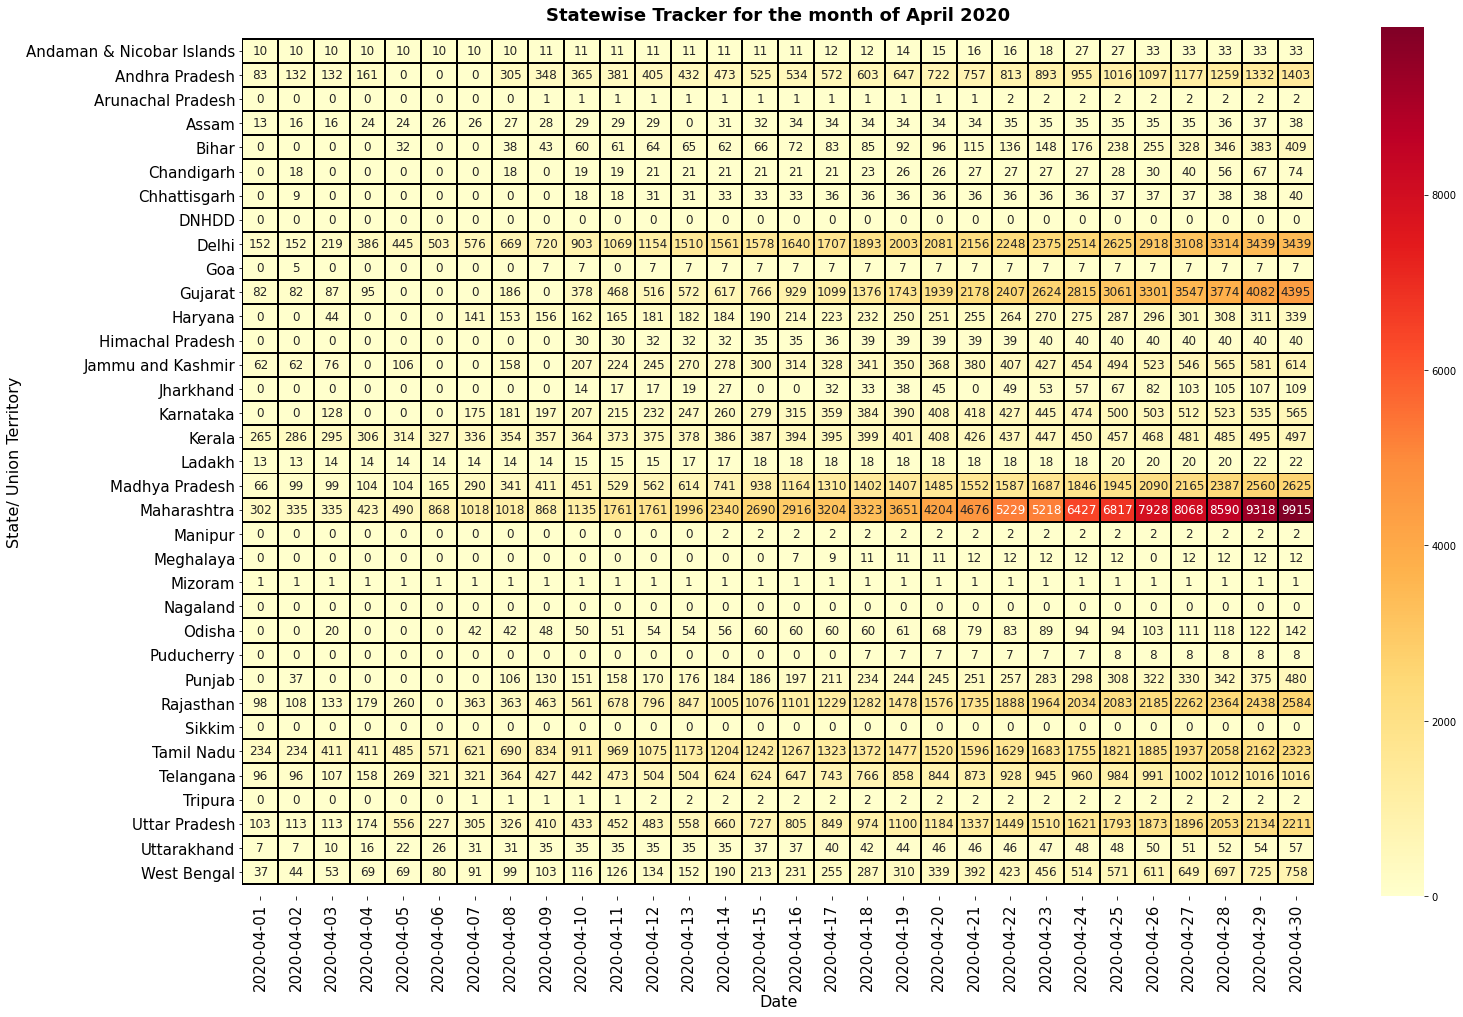

In [30]:
fig = plt.figure(figsize=(24,16))
ax1 = sns.heatmap(df_statewise_April, cmap="YlOrRd", linewidth = 1, linecolor="k", annot = True, annot_kws={"size": 12}, fmt = 'd')
ax1.tick_params(labelsize=15)
bottom, top = ax1.get_ylim();
ax1.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Statewise Tracker for the month of April 2020",fontsize = 18, fontweight="bold");
plt.ylabel("State/ Union Territory", fontsize = 16);
plt.xlabel("Date", fontsize = 16);
plt.savefig("figure_April.png")

#### May

In [31]:
df_statewise_May = df_statewise_new[[ '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
       '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', ]]
df_statewise_May.head()

Date,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,33,33,33,33,33,33,33,33,33,33,33,33,33
Andhra Pradesh,1463,1525,1583,1650,1717,1777,1833,1887,1930,1980,2018,2051,2137,2100,2157,0,2230,2282,2339,2407,2452,2514,2561,2627,2671,2719,2787,2841,2874,2944,3045
Arunachal Pradesh,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,4,4
Assam,0,42,0,42,43,0,0,0,59,62,64,64,0,86,86,91,97,106,141,170,203,259,329,378,526,616,0,0,1024,1185,1272
Bihar,466,476,485,525,529,539,547,564,585,653,714,796,909,970,1010,1083,1193,1391,1495,1607,1881,2098,2344,2507,0,0,3010,3106,3276,3511,3692


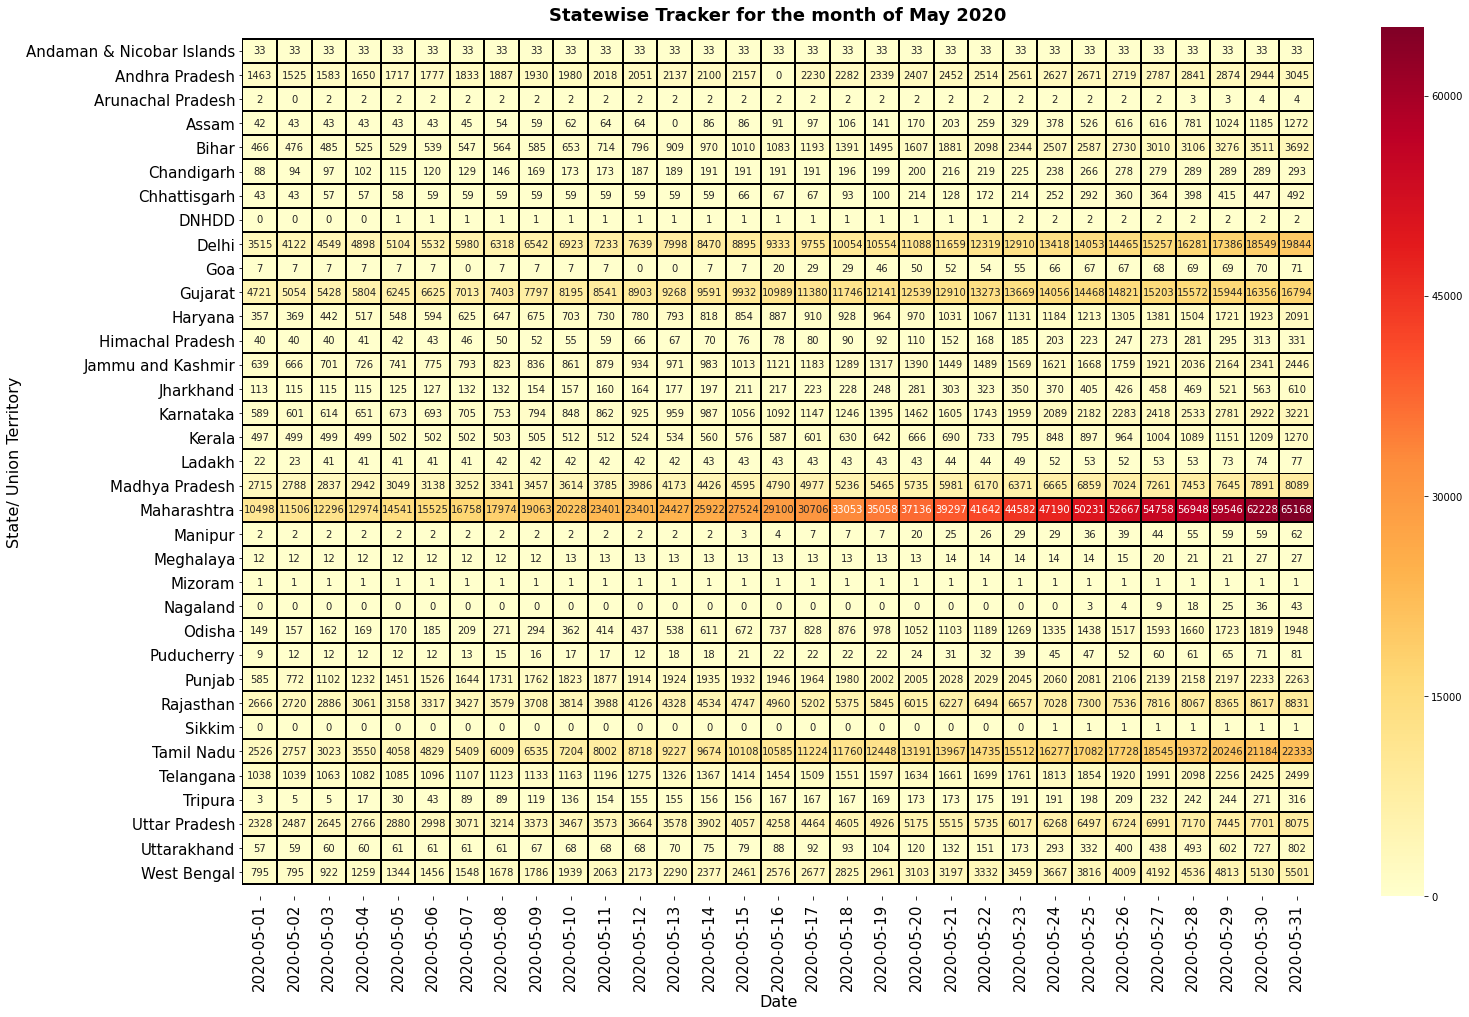

In [33]:
fig = plt.figure(figsize=(24,16))
ax1 = sns.heatmap(df_statewise_May, cmap="YlOrRd", linewidth = 1, linecolor="k", annot = True, annot_kws={"size": 10}, fmt = 'd')
ax1.tick_params(labelsize=15)
bottom, top = ax1.get_ylim();
ax1.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Statewise Tracker for the month of May 2020",fontsize = 18, fontweight="bold");
plt.ylabel("State/ Union Territory", fontsize = 16);
plt.xlabel("Date", fontsize = 16);
plt.savefig("figure_May.png")

#### June

In [34]:
df_statewise_June = df_statewise_new[['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
       '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
       '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-20']]
df_statewise_June.head()

Date,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20
State,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,33,33,33,33,33,33,33,33,33,35,38,38,38,38,41,44,44,45,47,47
Andhra Pradesh,3118,3200,3279,3377,3427,3588,3718,3843,3990,4126,4261,4402,4588,4841,5087,5280,5555,5854,6230,6620
Arunachal Pradesh,22,28,38,43,46,49,51,57,57,61,67,87,88,0,95,99,103,103,135,135
Assam,0,1513,1672,1988,0,2397,2565,0,2937,0,3319,3498,0,0,4158,4319,4605,4861,4904,5006
Bihar,3872,4049,4273,4420,4551,4745,4972,5176,5364,5583,5807,6043,6183,6355,6581,6736,6889,6993,7178,7380


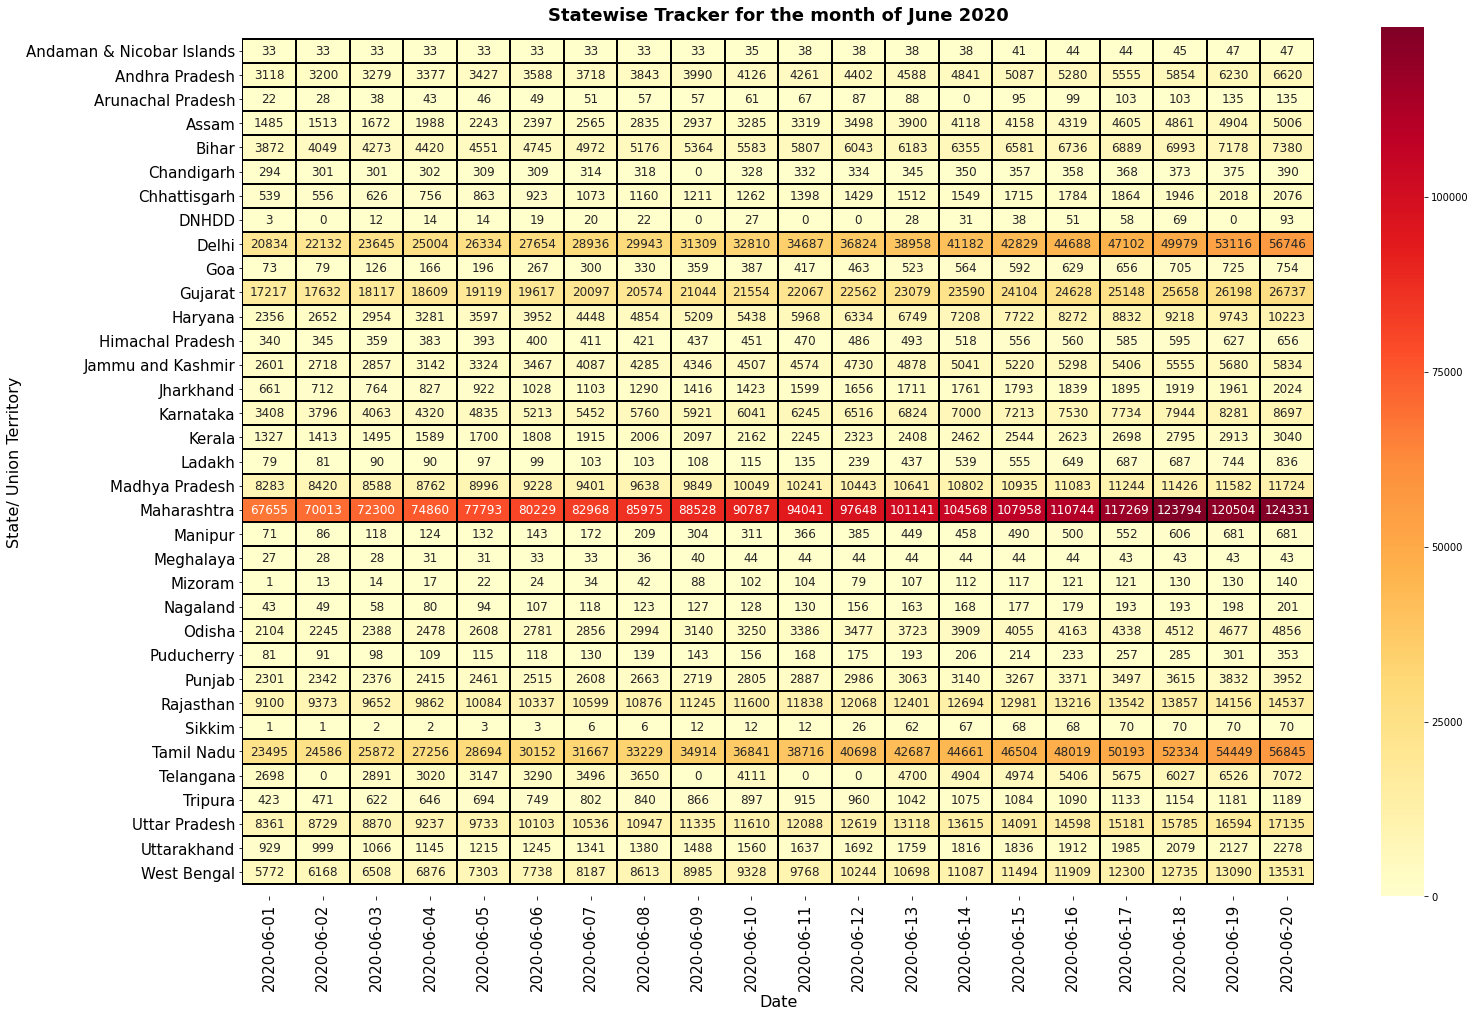

In [36]:
fig = plt.figure(figsize=(24,16))
ax1 = sns.heatmap(df_statewise_June, cmap="YlOrRd", linewidth = 1, linecolor="k", annot = True, annot_kws={"size": 12}, fmt = 'd')
ax1.tick_params(labelsize=15)
bottom, top = ax1.get_ylim();
ax1.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Statewise Tracker for the month of June 2020",fontsize = 18, fontweight="bold");
plt.ylabel("State/ Union Territory", fontsize = 16);
plt.xlabel("Date", fontsize = 16);
plt.savefig("figure_June.png")

### 4. Datewise count of total number of confirmed cases, recoveries, deaths and samples tested

In [37]:
df_complete = pd.read_csv("complete_25062020.csv")
df_complete.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [38]:
df_complete = df_complete.rename(columns={"Death": "Total Deaths", "Cured/Discharged/Migrated": "Total Recovered"})
df_complete.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Total Deaths,Total Recovered,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [39]:
#Total Cases in India Datewise
corona_data = df_complete.groupby(['Date'])['Total Confirmed cases'].sum().reset_index().sort_values('Total Confirmed cases',ascending = True)

fig = px.bar(corona_data, y='Total Confirmed cases', x='Date',hover_data =['Total Confirmed cases'], height=500) #bar chart using plotly
fig.update_layout(
    title='Total Confirmed Cases in India Datewise')
fig.show()

In [40]:
#Total Deaths in India Datewise
corona_data = df_complete.groupby(['Date'])['Total Deaths'].sum().reset_index().sort_values('Total Deaths',ascending = True)

fig = px.bar(corona_data, y='Total Deaths', x='Date',hover_data =['Total Deaths'], height=500) #bar chart using plotly
fig.update_traces(marker_color='rgb(255,0,0)')
fig.update_layout(
    title='Total Deaths in India Datewise')
fig.show()

In [41]:
#Total Recoveries in India Datewise
corona_data = df_complete.groupby(['Date'])['Total Recovered'].sum().reset_index().sort_values('Total Recovered',ascending = True)

fig = px.bar(corona_data, y='Total Recovered', x='Date',hover_data =['Total Recovered'], height=500) #bar chart using plotly
fig.update_traces(marker_color='rgb(0,128,0)')
fig.update_layout(
    title='Total Recoveries in India Datewise')
fig.show()

### 5. Statewise counts of highest number of confirmed cases, recoveries, deaths and samples tested

In [42]:
#Top 10 states by Total cases dataframe
top10_totalcases = pd.DataFrame(df_complete.groupby("Name of State / UT")["New cases"].sum()).reset_index().sort_values(by='New cases', ascending = False).head(10)
top10_totalcases

,Name of State / UT,New cases
19,Maharashtra,142902
8,Delhi,70389
29,Tamil Nadu,67467
10,Gujarat,28941
36,Uttar Pradesh,19551
27,Rajasthan,16008
38,West Bengal,15172
18,Madhya Pradesh,12444
11,Haryana,11996
1,Andhra Pradesh,10330


In [43]:
top10_totalcases.rename(columns={"Name of State / UT":"State/ UT", "New cases":"Total Cases"}, inplace = True)
top10_totalcases

,State/ UT,Total Cases
19,Maharashtra,142902
8,Delhi,70389
29,Tamil Nadu,67467
10,Gujarat,28941
36,Uttar Pradesh,19551
27,Rajasthan,16008
38,West Bengal,15172
18,Madhya Pradesh,12444
11,Haryana,11996
1,Andhra Pradesh,10330


In [44]:
#Top 10 states by Total cases
fig = px.bar(top10_totalcases, y='State/ UT', x='Total Cases',
             hover_data=['Total Cases'], height=500, orientation='h'
            )
fig.update_layout(yaxis=dict(autorange="reversed"),
    title='Top 10 states by Total number of confirmed cases')
fig.show()

In [45]:
#Top 10 states by Total deaths
top10_totaldeaths = pd.DataFrame(df_complete.groupby("Name of State / UT")["New deaths"].sum()).reset_index().sort_values(by='New deaths', ascending = False).head(10)
top10_totaldeaths

,Name of State / UT,New deaths
19,Maharashtra,6739
8,Delhi,2365
10,Gujarat,1735
29,Tamil Nadu,866
36,Uttar Pradesh,596
38,West Bengal,591
18,Madhya Pradesh,534
27,Rajasthan,375
11,Haryana,188
15,Karnataka,164


In [46]:
top10_totaldeaths.rename(columns={"Name of State / UT":"State/ UT", "New deaths":"Total Deaths"}, inplace = True)
top10_totaldeaths

,State/ UT,Total Deaths
19,Maharashtra,6739
8,Delhi,2365
10,Gujarat,1735
29,Tamil Nadu,866
36,Uttar Pradesh,596
38,West Bengal,591
18,Madhya Pradesh,534
27,Rajasthan,375
11,Haryana,188
15,Karnataka,164


In [47]:
#Top 10 states by Total deaths
fig = px.bar(top10_totaldeaths, y='State/ UT', x='Total Deaths',
             hover_data=['Total Deaths'], height=500, orientation='h'
            )
fig.update_traces(marker_color='rgb(255,0,0)')
fig.update_layout(yaxis=dict(autorange="reversed"),
    title='Top 10 states by Total number of confirmed deaths')
fig.show()

In [48]:
#Top 10 states by Total recoveries
top10_recoveries = pd.DataFrame(df_complete.groupby("Name of State / UT")["New recovered"].sum()).reset_index().sort_values(by='New recovered', ascending = False).head(10)
top10_recoveries

,Name of State / UT,New recovered
19,Maharashtra,73792
8,Delhi,41437
29,Tamil Nadu,37763
10,Gujarat,21088
27,Rajasthan,12611
36,Uttar Pradesh,12586
38,West Bengal,9702
18,Madhya Pradesh,9473
11,Haryana,6925
15,Karnataka,6151


In [49]:
top10_recoveries.rename(columns={"Name of State / UT":"State/ UT", "New recovered":"Total Recoveries"}, inplace = True)
top10_recoveries

,State/ UT,Total Recoveries
19,Maharashtra,73792
8,Delhi,41437
29,Tamil Nadu,37763
10,Gujarat,21088
27,Rajasthan,12611
36,Uttar Pradesh,12586
38,West Bengal,9702
18,Madhya Pradesh,9473
11,Haryana,6925
15,Karnataka,6151


In [50]:
#Top 10 states by Total recoveries
fig = px.bar(top10_recoveries, y='State/ UT', x='Total Recoveries',
             hover_data=['Total Recoveries'], height=500, orientation='h'
            )

fig.update_layout(yaxis=dict(autorange="reversed"),
    title='Top 10 states by Total number of recoveries')
fig.show()

In [51]:
#testing in states
df_statewise.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [52]:
#Top 10 states by Total samples tested
top10_totalsamples = pd.DataFrame(df_statewise.groupby("State")["TotalSamples"].max()).reset_index().sort_values(by='TotalSamples', ascending = False).head(10)
top10_totalsamples

,State,TotalSamples
29,Tamil Nadu,919204.0
19,Maharashtra,789016.0
27,Rajasthan,709592.0
1,Andhra Pradesh,693548.0
32,Uttar Pradesh,542972.0
15,Karnataka,515969.0
34,West Bengal,410854.0
8,Delhi,384696.0
10,Gujarat,329343.0
13,Jammu and Kashmir,313687.0


In [53]:
top10_totalsamples.rename(columns={"State":"State/ UT", "TotalSamples":"Total Samples Tested"}, inplace = True)
top10_totalsamples

,State/ UT,Total Samples Tested
29,Tamil Nadu,919204.0
19,Maharashtra,789016.0
27,Rajasthan,709592.0
1,Andhra Pradesh,693548.0
32,Uttar Pradesh,542972.0
15,Karnataka,515969.0
34,West Bengal,410854.0
8,Delhi,384696.0
10,Gujarat,329343.0
13,Jammu and Kashmir,313687.0


In [54]:
#Top 10 states by Total deaths
fig8 = px.bar(top10_totalsamples, y='State/ UT', x='Total Samples Tested',
             hover_data=['Total Samples Tested'], height=500, orientation='h'
            )
fig8.update_traces(marker_color='rgb(255,178,108)')
fig8.update_layout(yaxis=dict(autorange="reversed"),
    title='Top 10 states by Total number of samples tested')
fig8.show()

In [75]:
### opensource data
df_open = pd.read_csv("opensource-covid-data.csv")
df_open.head(10)

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
0,12/31/2019,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1/1/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1/2/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1/3/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1/4/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,1/5/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,1/6/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,1/7/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,1/8/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9,1/9/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [56]:
df_open.rename(columns={"total_tests":"Total samples Tested", "date":"Date"}, inplace = True)
df_open.head()

,Date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,Total samples Tested,new_tests,total_tests_per_thousand,new_tests_per_thousand
0,12/31/2019,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1/1/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1/2/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1/3/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1/4/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
df_open['Date'] = pd.to_datetime(df_open.Date)
df_open.head()

,Date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,Total samples Tested,new_tests,total_tests_per_thousand,new_tests_per_thousand
0,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [58]:
#Total Tests in India Datewise
corona_data = df_open.groupby(['Date'])['Total samples Tested'].sum().reset_index().sort_values('Total samples Tested',ascending = True)

fig7 = px.bar(corona_data, y='Total samples Tested', x='Date',hover_data =['Total samples Tested'], height=500) #bar chart using plotly
fig7.update_traces(marker_color='rgb(255,178,108)')
fig7.update_layout(
    title='Total samples tested in India Datewise')
fig7.show()